## 1 简介
本文档记录了收集、处理、分析 WeRateDogs 的推特档案数据集的过程，以及简单的探索分析结果。

## 2 收集

### 2.1 读取手头文件twitter_archive_enhanced.csv 

In [113]:
import pandas as pd
import numpy as np

In [114]:
df_tw_origin = pd.read_csv('twitter-archive-enhanced.csv')

In [115]:
df_tw_origin.shape

(2356, 17)

### 2.2 编程下载推特图像的预测数据
编程下载推特图像的预测数据，存储为image-predictions.tsv

In [116]:
import requests

In [117]:
img_predict_url = "https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/数据清洗/WeRateDogs项目/image-predictions.tsv"
response = requests.get(img_predict_url)
with open('image-predictions.tsv','wb') as f:
    f.write(response.content)

In [118]:
df_tw_ip = pd.read_csv('image-predictions.tsv',sep='\t')

In [119]:
df_tw_ip.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [120]:
df_tw_ip.shape

(2075, 12)

### 2.3 获取每条推特的附加数据
使用tweepy，通过api获取每条推特的附加数据

In [121]:
import json

tw_lines = []
with open('tweet_json.txt','r') as f:
    lines = f.readlines()
    for line in lines:
        tw_lines.append(json.loads(line[:-1]))

In [122]:
df_tw_more = pd.DataFrame(tw_lines)

In [123]:
df_tw_more.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39492,False,This is Phineas. He's a mystical boy. Only eve...,None,...,False,NaN,NaN,NaN,8842,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33786,False,This is Tilly. She's just checking pup on you....,None,...,False,NaN,NaN,NaN,6480,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25445,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,False,NaN,NaN,NaN,4301,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42863,False,This is Darla. She commenced a snooze mid meal...,None,...,False,NaN,NaN,NaN,8925,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41016,False,This is Franklin. He would like you to stop ca...,None,...,False,NaN,NaN,NaN,9721,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [124]:
df_tw_more.shape

(2352, 31)

In [125]:
df_tw_more.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2352 non-null object
display_text_range               2352 non-null object
entities                         2352 non-null object
extended_entities                2073 non-null object
favorite_count                   2352 non-null int64
favorited                        2352 non-null bool
full_text                        2352 non-null object
geo                              0 non-null object
id                               2352 non-null int64
id_str                           2352 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

In [126]:
df_tw_origin['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [127]:
df_tw_origin['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [128]:
df_tw_ip.sample(6)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1482,781163403222056960,https://pbs.twimg.com/media/Ctc_-BTWEAAQpZh.jpg,1,Shetland_sheepdog,0.973841,True,collie,0.025188,True,Border_collie,0.000297,True
139,668542336805281792,https://pbs.twimg.com/media/CUcjtL8WUAAAJoz.jpg,1,American_Staffordshire_terrier,0.267695,True,French_bulldog,0.254050,True,Staffordshire_bullterrier,0.212381,True
1206,742150209887731712,https://pbs.twimg.com/media/CkylrVWWsAAiXJE.jpg,1,Siamese_cat,0.112413,False,French_bulldog,0.071414,True,hog,0.062465,False
1016,709901256215666688,https://pbs.twimg.com/media/CdoTbL_XIAAitq2.jpg,2,bib,0.998814,False,handkerchief,0.000512,False,umbrella,0.000224,False
1669,813066809284972545,https://pbs.twimg.com/media/C0iX8OOVEAEIpMC.jpg,1,toy_terrier,0.776400,True,Pembroke,0.115034,True,basenji,0.048873,True
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False


In [129]:
df_tw_ip['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [130]:
df_tw_more.sample(6)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
628,None,None,Thu Nov 03 15:51:10 +0000 2016,"[0, 119]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 794205269047836673, 'id_str'...",10273,False,This is Laika. She was a space pupper. The fir...,None,...,False,NaN,NaN,NaN,3874,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
370,None,None,Sun Feb 05 22:55:23 +0000 2017,"[0, 112]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 828376488684695552, 'id_str'...",8084,False,"This is Beebop. Her name means ""Good Dog"" in r...",None,...,False,NaN,NaN,NaN,1210,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
789,None,None,Wed Sep 07 15:44:53 +0000 2016,"[0, 68]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 773547591439122432, 'id_str'...",24461,False,This is Chelsea. She forgot how to dog. 11/10 ...,None,...,False,NaN,NaN,NaN,7085,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
607,None,None,Sat Nov 12 00:36:46 +0000 2016,"[0, 89]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 797236631975657472, 'id_str'...",22250,False,This is Pancake. She loves Batman and winks li...,None,...,False,NaN,NaN,NaN,7693,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1192,None,None,Mon Apr 04 17:53:31 +0000 2016,"[0, 136]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 717047453128790017, 'id_str'...",6799,False,This is Flávio (pronounced Baxter). He's a Ben...,None,...,False,NaN,NaN,NaN,2128,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2323,None,None,Tue Nov 17 00:06:54 +0000 2015,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666407121513275392, 'id_str'...",113,False,This is a southern Vesuvius bumblegruff. Can d...,None,...,False,NaN,NaN,NaN,43,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [131]:
df_tw_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [132]:
df_tw_ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [133]:
df_tw_more.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2352 non-null object
display_text_range               2352 non-null object
entities                         2352 non-null object
extended_entities                2073 non-null object
favorite_count                   2352 non-null int64
favorited                        2352 non-null bool
full_text                        2352 non-null object
geo                              0 non-null object
id                               2352 non-null int64
id_str                           2352 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

In [134]:
df_tw_origin['name'].sort_values()

1035            Abby
1021            Abby
938              Ace
1933            Acro
1327           Adele
1934           Aiden
77               Aja
480            Akumi
820               Al
875           Albert
1954          Albert
144            Albus
412            Albus
1115         Aldrick
2046       Alejandro
374        Alexander
1189    Alexanderson
486              Alf
2238           Alfie
661            Alfie
367            Alfie
1616           Alfie
858            Alfie
51              Alfy
201            Alice
1701           Alice
1495           Amber
1334         Ambrose
2078             Amy
2195          Amélie
            ...     
852               my
988              not
335              not
1747      officially
1206             old
993              one
1936             one
924              one
369              one
2326           quite
169            quite
118            quite
193            quite
2030           space
22              such
2345             the
2346         

## 评估
#### 质量问题
###### `twitter-archive-enhanced`表
1. retweeted_status_id、retweeted_status_user_id、retweeted_status_timestamp记录不为空的是转发的推特，不是我们要的数据；
2. text列含有“^RT @”的也表示转发数据，不是我们要的数据；
3. 缺失：有1976条数据没有狗的等级分类
4. 质量：timestamp：数据类型应为datetime，不是object
5. 质量：tweet_id 应为str类型，而不是int
6. 缺失：expanded_urls 有缺失
7. 质量：'rating_numerator' 有数值为几百，甚至上千的评分，可能有误识别
8. 质量：'rating_denominator' 分母固定为10，却只有2333个为10，其余的可能存在误识别的问题
9. 质量：'name' 有很多无意义的名字
    
###### `image-predictions`表
1. 缺失（Maybe）：twitter-archive-enhanced 表中有2356条推特数据，image-predictions 表中只有2075条记录，有缺失
2. 质量：img_num 列应该只有1、2、3三种选择，出现了31个4，即表示最可能的是猜测4，猜测4并没有给出

###### `twett_json` 表
1. 质量：created_at 时间应为datetime，不是object
2. 缺失：twitter-archive-enhanced 表中有2356条推特数据，twett_json表中只有2351条记录，有缺失

#### 整洁度问题
1. 狗的等级评定不应该是4列，而是一列“狗的等级”，数据类型为“分类”：doggo、floofer、pupper、puppo
2. 三张表的内容都是有关于一条推特的，应该合并


## 清理
### 1. 备份

In [135]:
df_tw_orgin_clean = df_tw_origin.copy()
df_tw_ip_clean = df_tw_ip.copy()
df_tw_more_clean = df_tw_more.copy()

### 2. 问题处理

#### 2.1 项目要求问题
#### 定义
1. 筛选出不是转发的数据（retweeted_status_id、retweeted_status_user_id、retweeted_status_timestamp为空的）赋值给`df_tw_orgin_clean`;
2. 再删除掉这几列;

#### 编码

In [136]:
df_tw_orgin_clean = df_tw_orgin_clean[df_tw_orgin_clean.retweeted_status_id.isnull()]

In [137]:
df_tw_orgin_clean[['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']].any()

retweeted_status_id           False
retweeted_status_user_id      False
retweeted_status_timestamp    False
dtype: bool

#### 编码
删除掉retweeted_status_timestamp、retweeted_status_id、retweeted_status_user_id

In [138]:
df_tw_orgin_clean = df_tw_orgin_clean.drop(['retweeted_status_timestamp','retweeted_status_id','retweeted_status_user_id'],axis=1)

#### 测试

In [139]:
df_tw_orgin_clean.sample(6)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1458,695074328191332352,NaN,NaN,2016-02-04 02:40:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lorenzo. He's educated af. Just gradua...,https://twitter.com/dog_rates/status/695074328...,11,10,Lorenzo,None,None,pupper,None
684,788178268662984705,NaN,NaN,2016-10-18 00:41:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Atlas is back and this time he's got doggles. ...,https://twitter.com/dog_rates/status/788178268...,13,10,None,None,None,None,None
1589,686683045143953408,NaN,NaN,2016-01-11 22:56:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mona. She's a Yarborough Splishnsplash...,https://twitter.com/dog_rates/status/686683045...,11,10,Mona,None,None,pupper,None
1157,724405726123311104,NaN,NaN,2016-04-25 01:12:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ashleigh. She's having Coachella withd...,https://twitter.com/dog_rates/status/724405726...,10,10,Ashleigh,None,None,pupper,None
373,828376505180889089,NaN,NaN,2017-02-05 22:55:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Beebop. Her name means ""Good Dog"" in r...",https://twitter.com/dog_rates/status/828376505...,13,10,Beebop,None,None,None,None
1015,747103485104099331,NaN,NaN,2016-06-26 16:25:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys... I said DOGS with ""shark qualities"" or ...",https://twitter.com/dog_rates/status/747103485...,11,10,None,None,None,None,None


#### 2.2 整洁度问题
#### 2.2.1 合并三张表
#### 定义
1. 使用内连接将图片预测表与原始的推特记录表合并，只保留同时具有推特信息与图片信息的推特数据
2. 使用内连接将上一步合并后的数据再与附加信息表合并，只保留同时在三张表中都有数据的推特

#### 编码

In [140]:
#df_tw_orgin_clean = df_tw_orgin_clean.merge(df_tw_ip_clean, how='left', on='tweet_id')
#df_tw_orgin_clean = df_tw_orgin_clean.merge(df_tw_more_clean, how='left', left_on='tweet_id',right_on='id')
df_tweet_merged_clean = df_tw_orgin_clean.merge(df_tw_ip_clean,how='inner', on='tweet_id')

In [141]:
df_tweet_merged_clean = df_tweet_merged_clean.merge(df_tw_more_clean, how='inner', left_on='tweet_id', right_on='id')

#### 测试

In [142]:
df_tweet_merged_clean.sample(5)

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source_y,truncated,user
1198,691090071332753408,NaN,NaN,2016-01-24 02:48:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's a dog in a mailbox. 12/1...,https://twitter.com/dog_rates/status/691090071...,12,10,None,...,False,NaN,NaN,NaN,385,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
472,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,https://twitter.com/dog_rates/status/792913359...,13,10,a,...,False,NaN,NaN,NaN,4693,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1128,697575480820686848,NaN,NaN,2016-02-11 00:18:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ole. He's not sure how to gravity. 8/1...,https://twitter.com/dog_rates/status/697575480...,8,10,Ole,...,False,NaN,NaN,NaN,569,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
859,728986383096946689,NaN,NaN,2016-05-07 16:34:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Puff. He started out on the streets (f...,https://twitter.com/dog_rates/status/728986383...,11,10,Puff,...,False,NaN,NaN,NaN,911,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
697,752660715232722944,NaN,NaN,2016-07-12 00:27:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Hooman used Pokeball\n*wiggle*\n*wiggle*\nDogg...,https://twitter.com/dog_rates/status/752660715...,10,10,None,...,False,NaN,NaN,NaN,1784,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [143]:
df_tweet_merged_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 56 columns):
tweet_id                         1994 non-null int64
in_reply_to_status_id_x          23 non-null float64
in_reply_to_user_id_x            23 non-null float64
timestamp                        1994 non-null object
source_x                         1994 non-null object
text                             1994 non-null object
expanded_urls                    1994 non-null object
rating_numerator                 1994 non-null int64
rating_denominator               1994 non-null int64
name                             1994 non-null object
doggo                            1994 non-null object
floofer                          1994 non-null object
pupper                           1994 non-null object
puppo                            1994 non-null object
jpg_url                          1994 non-null object
img_num                          1994 non-null int64
p1                               19

In [144]:
df_tweet_merged_clean.columns

Index(['tweet_id', 'in_reply_to_status_id_x', 'in_reply_to_user_id_x',
       'timestamp', 'source_x', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'contributors', 'coordinates',
       'created_at', 'display_text_range', 'entities', 'extended_entities',
       'favorite_count', 'favorited', 'full_text', 'geo', 'id', 'id_str',
       'in_reply_to_screen_name', 'in_reply_to_status_id_y',
       'in_reply_to_status_id_str', 'in_reply_to_user_id_y',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'retweet_count',
       'retweeted', 'retweeted_status', 'source_y', 'truncated', 'user'],
      dtype='object')

#### 2.2.2 处理狗狗等级的整洁度问题
#### 定义
1. 使用melt函数将`doggo`, `floofer`, `pupper`, `puppo`这几列的列名转换为“dog_stage"列的值，原本的值存入“dog_stage_name”中
2. 检查推特id是否重复，如果有重复的就将重复两行的dog_stage_name值合并，用“，”分隔
3. 清除掉`tweet_id`重复的数据

#### 编码

In [145]:
df_temp_dog_stage = pd.melt(df_tweet_merged_clean,id_vars=['tweet_id'],value_vars=['doggo','floofer','pupper','puppo'], var_name='dog_stage_type', value_name='dog_stage_name')

In [146]:
s_dogstage_merge = df_temp_dog_stage.groupby(by='tweet_id').apply(lambda x: ','.join(x['dog_stage_name']))

In [147]:
df_dogstage = pd.DataFrame(s_dogstage_merge,columns=['dog_stage'])

In [148]:
df_dogstage = df_dogstage.reset_index(level=0)

In [149]:
df_dogstage.head()

,tweet_id,dog_stage
0,666020888022790149,"None,None,None,None"
1,666029285002620928,"None,None,None,None"
2,666033412701032449,"None,None,None,None"
3,666044226329800704,"None,None,None,None"
4,666049248165822465,"None,None,None,None"


In [150]:
df_dogstage['dog_stage'] = df_dogstage['dog_stage'].str.replace('None',"").str.strip(to_strip = ',')

In [151]:
df_tweet_merged_clean = df_tweet_merged_clean.merge(df_dogstage,how='left', on='tweet_id')

In [152]:
df_tweet_merged_clean = df_tweet_merged_clean.drop(['doggo','floofer','pupper','puppo'],axis=1)

#### 测试

In [153]:
df_tweet_merged_clean[df_tweet_merged_clean['dog_stage'] != ""]['dog_stage'].sample(5)

676      doggo
78       puppo
316      doggo
927      doggo
1272    pupper
Name: dog_stage, dtype: object

### 2.3 其它质量问题
#### 2.3.1数据类型问题
#### 定义：
使用to_datetime将timestamp的数据类型改为datetime

#### 编码

In [154]:
df_tweet_merged_clean['timestamp'] = pd.to_datetime(df_tweet_merged_clean['timestamp'])

#### 测试

In [155]:
df_tweet_merged_clean.timestamp.head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

#### 2.3.2 质量问题：狗狗评分的分子、分母有误读
#### 定义
1. 找出所有分母不为 10 或者分子大于20 的行
2. 人工识别这些推特中评分的分子（rating_numerato）分母（rating_denominator）
    - 如果是误读，则将正确的人工读取并填充到数据集中
    - 如果是多个的评分，保持原样
    - 如果是无效评分，保留原样

#### 编码

In [156]:
df_tweet_merged_clean[(df_tweet_merged_clean.rating_denominator != 10) | (df_tweet_merged_clean.rating_numerator > 20)].loc[:,['text','rating_denominator','rating_numerator']]

,text,rating_denominator,rating_numerator
323,The floofs have been released I repeat the flo...,70,84
385,Meet Sam. She smiles 24/7 &amp; secretly aspir...,7,24
503,"This is Logan, the Chow who lived. He solemnly...",10,75
553,This is Sophie. She's a Jubilant Bush Pupper. ...,10,27
662,Why does this never happen at my front door......,150,165
726,This is Atticus. He's quite simply America af....,10,1776
800,"After so many requests, this is Bretagne. She ...",11,9
848,Say hello to this unbelievably well behaved sq...,170,204
891,Happy 4/20 from the squad! 13/10 for all https...,20,4
925,This is Bluebert. He just saw that both #Final...,50,50


In [157]:
df_tweet_merged_clean.iloc[323]['text']

'The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd'

In [158]:
df_tweet_merged_clean.iloc[385]['text']

'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx'

In [159]:
df_tweet_merged_clean.iloc[503]['text']

"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"

In [160]:
df_tweet_merged_clean.loc[503,'rating_denominator'] = 10
df_tweet_merged_clean.loc[503,'rating_numerator'] = 9.75

In [161]:
df_tweet_merged_clean.iloc[553]['text']

"This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq"

In [162]:
df_tweet_merged_clean.loc[553,'rating_denominator'] = 10
df_tweet_merged_clean.loc[553,'rating_numerator'] = 11.27

In [163]:
df_tweet_merged_clean.iloc[662]['text']

'Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE'

In [164]:
df_tweet_merged_clean.iloc[726]['text']

"This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh"

In [165]:
df_tweet_merged_clean.iloc[800]['text']

'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ'

In [166]:
df_tweet_merged_clean.loc[800,'rating_denominator'] = 10
df_tweet_merged_clean.loc[800,'rating_numerator'] = 14

In [167]:
df_tweet_merged_clean.iloc[848]['text']

'Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv'

In [168]:
df_tweet_merged_clean.loc[848,'rating_denominator'] = 170
df_tweet_merged_clean.loc[848,'rating_numerator'] = 204

In [169]:
df_tweet_merged_clean.iloc[891]['text']

'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a'

In [170]:
df_tweet_merged_clean.loc[891,'rating_denominator'] = 10
df_tweet_merged_clean.loc[891,'rating_numerator'] = 13

In [171]:
df_tweet_merged_clean.iloc[925]['text']

'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq'

In [172]:
df_tweet_merged_clean.loc[925,'rating_denominator'] = 10
df_tweet_merged_clean.loc[925,'rating_numerator'] = 11

In [173]:
df_tweet_merged_clean.iloc[946]['text']

"Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1"

In [174]:
df_tweet_merged_clean.iloc[970]['text']

"Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12"

In [175]:
df_tweet_merged_clean.iloc[988]['text']

'From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK'

In [176]:
df_tweet_merged_clean.iloc[1054]['text']

"Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa"

In [177]:
df_tweet_merged_clean.iloc[1130]['text']

"Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ"

In [178]:
df_tweet_merged_clean.iloc[1302]['text']

'Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3'

In [179]:
df_tweet_merged_clean.iloc[1303]['text']

'Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55'

In [180]:
df_tweet_merged_clean.iloc[1328]['text']

'This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5'

In [181]:
df_tweet_merged_clean.loc[1328,'rating_denominator'] = 10
df_tweet_merged_clean.loc[1328,'rating_numerator'] = 10

In [182]:
df_tweet_merged_clean.iloc[1374]['text']

'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD'

In [183]:
df_tweet_merged_clean.loc[1374,'rating_denominator'] = 10
df_tweet_merged_clean.loc[1374,'rating_numerator'] = 11.26

In [184]:
df_tweet_merged_clean.iloc[1435]['text']

"IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq"

In [185]:
df_tweet_merged_clean.iloc[1494]['text']

'Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw'

In [186]:
df_tweet_merged_clean.iloc[1718]['text']

'After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY'

In [187]:
df_tweet_merged_clean.iloc[1973]['text']

'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'

In [188]:
df_tweet_merged_clean.loc[1973,'rating_denominator'] = 10
df_tweet_merged_clean.loc[1973,'rating_numerator'] = 9

#### 测试

In [189]:
df_tweet_merged_clean[(df_tweet_merged_clean.rating_denominator != 10) | (df_tweet_merged_clean.rating_numerator > 20)].loc[:,['text','rating_denominator','rating_numerator']]

,text,rating_denominator,rating_numerator
323,The floofs have been released I repeat the flo...,70,84.0
385,Meet Sam. She smiles 24/7 &amp; secretly aspir...,7,24.0
662,Why does this never happen at my front door......,150,165.0
726,This is Atticus. He's quite simply America af....,10,1776.0
848,Say hello to this unbelievably well behaved sq...,170,204.0
946,Happy Saturday here's 9 puppers on a bench. 99...,90,99.0
970,Here's a brigade of puppers. All look very pre...,80,80.0
988,"From left to right:\nCletus, Jerome, Alejandro...",50,45.0
1054,Here is a whole flock of puppers. 60/50 I'll ...,50,60.0
1130,Happy Wednesday here's a bucket of pups. 44/40...,40,44.0


In [190]:
df_tweet_merged_clean.img_num.value_counts()

1    1711
2     191
3      62
4      30
Name: img_num, dtype: int64

#### 2.3.3 质量问题：最佳图片预测无效
img_num 列应该只有1、2、3三种选择，出现了31个4，即表示最可能的是猜测4，猜测4并没有给出
#### 定义
不知道这个需要如何处理
#### 编码

#### 2.3.4 质量问题：name无意义的问题
狗狗的姓名中有很多无意义的，明显不是狗狗名字的情况
#### 定义
1. 重新从text中提取狗狗姓名
2. 删除掉没有狗狗姓名的行
#### 编码

In [191]:
import re

In [192]:
df_tweet_merged_clean.name = df_tweet_merged_clean.text.apply(lambda x: ','.join(
    sorted(
        re.findall('(?:This is|Meet|Say hello to|THIS IS|named|name is|Here is|Here we have|found|NAME. IS.)\s([A-Z][^\s.,]*)'
                   ,x))))
df_tweet_merged_clean.loc[df_tweet_merged_clean.name == '','name'] = np.nan

#### 测试

In [193]:
df_tweet_merged_clean.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5            NaN
6            Jax
7            NaN
8           Zoey
9         Cassie
10          Koda
11         Bruno
12           NaN
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
19        Gerald
20       Jeffrey
21           NaN
22        Canela
23           NaN
24           NaN
25          Maya
26        Mingus
27         Derek
28        Roscoe
29       Waffles
          ...   
1964         NaN
1965         NaN
1966         NaN
1967         NaN
1968         NaN
1969         NaN
1970         NaN
1971         NaN
1972         NaN
1973         NaN
1974         NaN
1975         NaN
1976         NaN
1977         NaN
1978         NaN
1979         NaN
1980         NaN
1981         NaN
1982         NaN
1983         NaN
1984         NaN
1985         NaN
1986         NaN
1987         NaN
1988         NaN
1989         NaN
1990         NaN
1991         N

#### 2.3.5 质量问题：删除掉缺失严重的列
有一些列缺失严重，我们无法找到更多的信息来填充
#### 定义
删除掉in_reply_to_status_id_x、in_reply_to_user_id_x、contributors、coordinates、geo、in_reply_to_screen_name、
in_reply_to_status_id_y、in_reply_to_status_id_str、in_reply_to_user_id_y、in_reply_to_user_id_str、place、quoted_status、quoted_status_id、
quoted_status_id_str、retweeted_status

#### 编码

In [194]:
df_tweet_merged_clean = df_tweet_merged_clean.drop(['in_reply_to_status_id_x','in_reply_to_user_id_x','contributors','coordinates','geo','in_reply_to_screen_name','in_reply_to_status_id_y','in_reply_to_status_id_str','in_reply_to_user_id_y','in_reply_to_user_id_str','place','quoted_status','quoted_status_id','quoted_status_id_str','retweeted_status'],axis=1)

#### 测试

In [195]:
df_tweet_merged_clean.head()

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,is_quote_status,lang,possibly_sensitive,possibly_sensitive_appealable,retweet_count,retweeted,source_y,truncated,user,dog_stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,False,en,False,False,8842,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,False,en,False,False,6480,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,False,en,False,False,4301,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,False,en,False,False,8925,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,False,en,False,False,9721,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",


In [196]:
# 检查created_at 是否与 timestamp内容一致
sum(pd.to_datetime(df_tweet_merged_clean.created_at) == df_tweet_merged_clean.timestamp)

1994

In [197]:
# 检查 text 是否与 full_text 内容一致
sum(df_tweet_merged_clean.text == df_tweet_merged_clean.full_text)

1994

#### 2.3.6 质量问题：处理合并的时候内容重复的列

#### 定义
1. 删除掉source_y、id、full_text、created_at
2. 将source_x，改名为source；将id_str改名为tweet_id_str

####  编码

In [198]:
df_tweet_merged_clean = df_tweet_merged_clean.drop(['source_y','id','full_text','created_at'], axis=1)
df_tweet_merged_clean = df_tweet_merged_clean.rename(columns={'source_x':'source', 'id_str':'tweet_id_str'})

#### 测试

In [199]:
df_tweet_merged_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 34 columns):
tweet_id                         1994 non-null int64
timestamp                        1994 non-null datetime64[ns]
source                           1994 non-null object
text                             1994 non-null object
expanded_urls                    1994 non-null object
rating_numerator                 1994 non-null float64
rating_denominator               1994 non-null int64
name                             1386 non-null object
jpg_url                          1994 non-null object
img_num                          1994 non-null int64
p1                               1994 non-null object
p1_conf                          1994 non-null float64
p1_dog                           1994 non-null bool
p2                               1994 non-null object
p2_conf                          1994 non-null float64
p2_dog                           1994 non-null bool
p3                       

#### 2.3.7 优化

#### 定义
1. 保留需要的列：删除掉 entities、extended_entities 、favorited、is_quote_status、lang、possibly_sensitive、possibly_sensitive_appealable、retweeted、truncated、user
2. 新增一列展示评分，分子/分母
3. 重新排列列的顺序

####  编码

In [200]:
df_tweet_merged_clean = df_tweet_merged_clean.drop(['entities','extended_entities','favorited','is_quote_status','lang','possibly_sensitive','possibly_sensitive_appealable','retweeted','truncated','user'], axis=1)

In [201]:
df_tweet_merged_clean['rating'] = df_tweet_merged_clean.rating_numerator.map(str)+'/'+df_tweet_merged_clean.rating_denominator.map(str)

In [202]:
df_tweet_merged_clean = df_tweet_merged_clean[['tweet_id','text','name','rating','rating_numerator','rating_denominator','dog_stage','favorite_count','retweet_count'
                      ,'source','expanded_urls','jpg_url','img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'
                       ,'display_text_range','timestamp','tweet_id_str']]

#### 测试

In [203]:
df_tweet_merged_clean.head()

,tweet_id,text,name,rating,rating_numerator,rating_denominator,dog_stage,favorite_count,retweet_count,source,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,display_text_range,timestamp,tweet_id_str
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,Phineas,13.0/10,13.0,10,,39492,8842,"<a href=""http://twitter.com/download/iphone"" r...",...,False,bagel,0.085851,False,banana,0.076110,False,"[0, 85]",2017-08-01 16:23:56,892420643555336193
1,892177421306343426,This is Tilly. She's just checking pup on you....,Tilly,13.0/10,13.0,10,,33786,6480,"<a href=""http://twitter.com/download/iphone"" r...",...,True,Pekinese,0.090647,True,papillon,0.068957,True,"[0, 138]",2017-08-01 00:17:27,892177421306343426
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,Archie,12.0/10,12.0,10,,25445,4301,"<a href=""http://twitter.com/download/iphone"" r...",...,True,malamute,0.078253,True,kelpie,0.031379,True,"[0, 121]",2017-07-31 00:18:03,891815181378084864
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,Darla,13.0/10,13.0,10,,42863,8925,"<a href=""http://twitter.com/download/iphone"" r...",...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,"[0, 79]",2017-07-30 15:58:51,891689557279858688
4,891327558926688256,This is Franklin. He would like you to stop ca...,Franklin,12.0/10,12.0,10,,41016,9721,"<a href=""http://twitter.com/download/iphone"" r...",...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,"[0, 138]",2017-07-29 16:00:24,891327558926688256


In [273]:
df_tweet_merged_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 25 columns):
tweet_id              1994 non-null int64
text                  1994 non-null object
name                  1386 non-null object
rating                1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null int64
dog_stage             1994 non-null object
favorite_count        1994 non-null int64
retweet_count         1994 non-null int64
source                1994 non-null object
expanded_urls         1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null flo

### 数据存储

In [270]:
df_tweet_merged_clean.to_csv('twitter_archive_master.csv',index=False)

#### 测试

In [271]:
df_twitter_clean = pd.read_csv('twitter_archive_master.csv')

In [272]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 25 columns):
tweet_id              1994 non-null int64
text                  1994 non-null object
name                  1386 non-null object
rating                1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null int64
dog_stage             306 non-null object
favorite_count        1994 non-null int64
retweet_count         1994 non-null int64
source                1994 non-null object
expanded_urls         1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null floa

In [206]:
df_twitter_clean.head()

,tweet_id,text,name,rating,rating_numerator,rating_denominator,dog_stage,favorite_count,retweet_count,source,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,display_text_range,timestamp,tweet_id_str
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,Phineas,13.0/10,13.0,10,NaN,39492,8842,"<a href=""http://twitter.com/download/iphone"" r...",...,False,bagel,0.085851,False,banana,0.076110,False,"[0, 85]",2017-08-01 16:23:56,892420643555336193
1,892177421306343426,This is Tilly. She's just checking pup on you....,Tilly,13.0/10,13.0,10,NaN,33786,6480,"<a href=""http://twitter.com/download/iphone"" r...",...,True,Pekinese,0.090647,True,papillon,0.068957,True,"[0, 138]",2017-08-01 00:17:27,892177421306343426
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,Archie,12.0/10,12.0,10,NaN,25445,4301,"<a href=""http://twitter.com/download/iphone"" r...",...,True,malamute,0.078253,True,kelpie,0.031379,True,"[0, 121]",2017-07-31 00:18:03,891815181378084864
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,Darla,13.0/10,13.0,10,NaN,42863,8925,"<a href=""http://twitter.com/download/iphone"" r...",...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,"[0, 79]",2017-07-30 15:58:51,891689557279858688
4,891327558926688256,This is Franklin. He would like you to stop ca...,Franklin,12.0/10,12.0,10,NaN,41016,9721,"<a href=""http://twitter.com/download/iphone"" r...",...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,"[0, 138]",2017-07-29 16:00:24,891327558926688256


## 分析

In [207]:
df_twitter_clean.head()

,tweet_id,text,name,rating,rating_numerator,rating_denominator,dog_stage,favorite_count,retweet_count,source,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,display_text_range,timestamp,tweet_id_str
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,Phineas,13.0/10,13.0,10,NaN,39492,8842,"<a href=""http://twitter.com/download/iphone"" r...",...,False,bagel,0.085851,False,banana,0.076110,False,"[0, 85]",2017-08-01 16:23:56,892420643555336193
1,892177421306343426,This is Tilly. She's just checking pup on you....,Tilly,13.0/10,13.0,10,NaN,33786,6480,"<a href=""http://twitter.com/download/iphone"" r...",...,True,Pekinese,0.090647,True,papillon,0.068957,True,"[0, 138]",2017-08-01 00:17:27,892177421306343426
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,Archie,12.0/10,12.0,10,NaN,25445,4301,"<a href=""http://twitter.com/download/iphone"" r...",...,True,malamute,0.078253,True,kelpie,0.031379,True,"[0, 121]",2017-07-31 00:18:03,891815181378084864
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,Darla,13.0/10,13.0,10,NaN,42863,8925,"<a href=""http://twitter.com/download/iphone"" r...",...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,"[0, 79]",2017-07-30 15:58:51,891689557279858688
4,891327558926688256,This is Franklin. He would like you to stop ca...,Franklin,12.0/10,12.0,10,NaN,41016,9721,"<a href=""http://twitter.com/download/iphone"" r...",...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,"[0, 138]",2017-07-29 16:00:24,891327558926688256


In [275]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 25 columns):
tweet_id              1994 non-null int64
text                  1994 non-null object
name                  1386 non-null object
rating                1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null int64
dog_stage             306 non-null object
favorite_count        1994 non-null int64
retweet_count         1994 non-null int64
source                1994 non-null object
expanded_urls         1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null floa

In [274]:
df_twitter_clean['timestamp'] = pd.to_datetime(df_twitter_clean['timestamp'])

In [209]:
# 各等级狗狗的数量
df_twitter_clean['dog_stage'].value_counts()

pupper           203
doggo             63
puppo             22
doggo,,pupper      9
floofer            7
doggo,,,puppo      1
doggo,floofer      1
Name: dog_stage, dtype: int64

In [210]:
clean_copy = df_twitter_clean.copy()

In [211]:
clean_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 25 columns):
tweet_id              1994 non-null int64
text                  1994 non-null object
name                  1386 non-null object
rating                1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null int64
dog_stage             306 non-null object
favorite_count        1994 non-null int64
retweet_count         1994 non-null int64
source                1994 non-null object
expanded_urls         1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null floa

In [212]:
import matplotlib.pyplot as plt

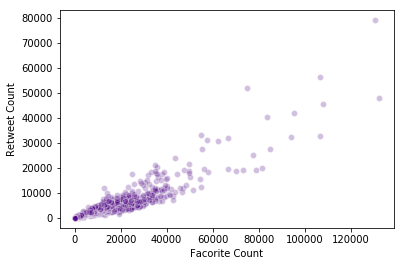

In [213]:
#转发数与点赞数的关系
plt.scatter(x=df_twitter_clean.favorite_count, y= df_twitter_clean.retweet_count, color='indigo', alpha=0.25, edgecolors='white', label='Test')
plt.xlabel('Facorite Count')
plt.ylabel('Retweet Count')
plt.show()

In [214]:
clean_copy['cat_dog_stage'] = 'others'
clean_copy.loc[clean_copy['dog_stage'] ==  'pupper', 'cat_dog_stage'] = 'pupper'
clean_copy.loc[clean_copy['dog_stage'] ==  'doggo', 'cat_dog_stage'] = 'doggo'
clean_copy.loc[clean_copy['dog_stage'] ==  'puppo', 'cat_dog_stage'] = 'puppo'

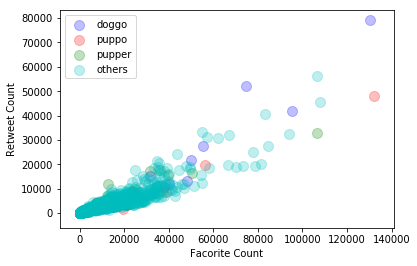

In [242]:
# 分类展示评定为不同等级宠物的推特的转发数和点赞数
def kindScatter(x,y,group,size=100,legendloc=2):
        kind = list(set(group))
        if len(kind) >7:
            print ("there is too much groups!")
        else:
            col = ['b','r','g','c','y','m','k']
            for i in range(len(kind)):
                xx = x[group==kind[i]]
                yy = y[group==kind[i]]      
                plt.scatter(xx,yy,s=size,c=col[i],
                alpha=0.25,label=kind[i])
                plt.legend(loc=legendloc,frameon=True)
                plt.xlabel('Facorite Count')
                plt.ylabel('Retweet Count')
                
kindScatter(x=clean_copy.favorite_count, y= clean_copy.retweet_count, group=clean_copy.cat_dog_stage)                

In [268]:
clean_copy.cat_dog_stage.value_counts()

others    1706
pupper     203
doggo       63
puppo       22
Name: cat_dog_stage, dtype: int64

In [216]:
clean_copy['cat_ratings'] ='--10'
clean_copy.loc[clean_copy['rating_numerator'] <10, 'cat_ratings'] = '--10'
clean_copy.loc[(clean_copy['rating_numerator'] >=10) &(clean_copy['rating_numerator'] <15), 'cat_ratings'] = '10-15'
clean_copy.loc[(clean_copy['rating_numerator'] >=15) &(clean_copy['rating_numerator'] <20), 'cat_ratings'] = '15-20'
clean_copy.loc[clean_copy['rating_numerator'] >20, 'cat_ratings'] = '20--'

In [217]:
clean_copy.cat_ratings.value_counts()

10-15    1567
--10      412
20--       15
Name: cat_ratings, dtype: int64

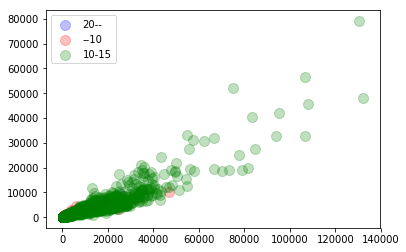

In [218]:
kindScatter(x=clean_copy.favorite_count, y= clean_copy.retweet_count, group=clean_copy.cat_ratings) 

In [219]:
clean_copy['cat_ratings2'] ='--10'
clean_copy.loc[clean_copy['rating_numerator'] <10, 'cat_ratings2'] = '--10'
clean_copy.loc[(clean_copy['rating_numerator'] >=10) &(clean_copy['rating_numerator'] <12), 'cat_ratings2'] = '10-12'
clean_copy.loc[(clean_copy['rating_numerator'] >=12) &(clean_copy['rating_numerator'] <15), 'cat_ratings2'] = '12-15'
clean_copy.loc[(clean_copy['rating_numerator'] >=15) &(clean_copy['rating_numerator'] <20), 'cat_ratings2'] = '15-20'
clean_copy.loc[clean_copy['rating_numerator'] >20, 'cat_ratings2'] = '20--'

In [220]:
clean_copy.cat_ratings2.value_counts()

10-12    819
12-15    748
--10     412
20--      15
Name: cat_ratings2, dtype: int64

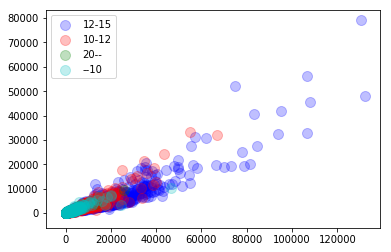

In [221]:
kindScatter(x=clean_copy.favorite_count, y= clean_copy.retweet_count, group=clean_copy.cat_ratings2) 

In [222]:
clean_copy['cat_ratings3'] ='--10'
clean_copy.loc[clean_copy['rating_numerator'] <10, 'cat_ratings2'] = '--10'
clean_copy.loc[(clean_copy['rating_numerator'] >=10) &(clean_copy['rating_numerator'] <11), 'cat_ratings3'] = '10-11'
clean_copy.loc[(clean_copy['rating_numerator'] >=11) &(clean_copy['rating_numerator'] <12), 'cat_ratings3'] = '11-12'
clean_copy.loc[(clean_copy['rating_numerator'] >=12) &(clean_copy['rating_numerator'] <13), 'cat_ratings3'] = '12-13'
clean_copy.loc[(clean_copy['rating_numerator'] >=13) &(clean_copy['rating_numerator'] <14), 'cat_ratings3'] = '13-14'
clean_copy.loc[(clean_copy['rating_numerator'] >=14) &(clean_copy['rating_numerator'] <15), 'cat_ratings3'] = '14-15'
clean_copy.loc[clean_copy['rating_numerator'] >15, 'cat_ratings3'] = '15--'

In [223]:
clean_copy.cat_ratings3.value_counts()

12-13    450
10-11    420
--10     412
11-12    399
13-14    262
14-15     36
15--      15
Name: cat_ratings3, dtype: int64

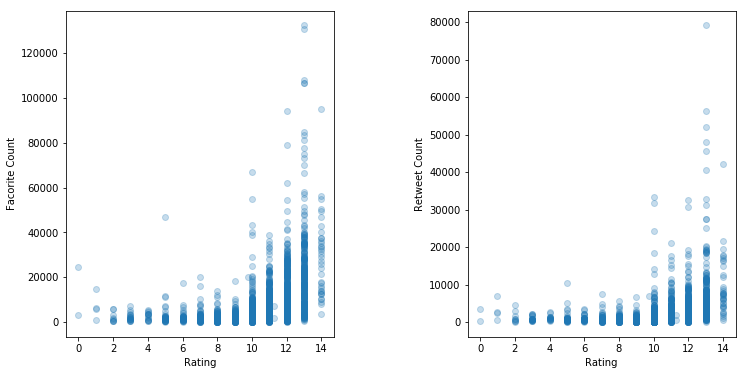

In [258]:
clean_copy_fillter = clean_copy[clean_copy.rating_numerator<15]
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.scatter(x=clean_copy_fillter.rating_numerator, y=clean_copy_fillter.favorite_count,  alpha=0.25)
plt.xlabel('Rating')
plt.ylabel('Facorite Count')
plt.subplot(122)
plt.scatter(x=clean_copy_fillter.rating_numerator, y=clean_copy_fillter.retweet_count,  alpha=0.25)
plt.xlabel('Rating')
plt.ylabel('Retweet Count')
plt.subplots_adjust(wspace =0.5)#调整子图间距
plt.show()

## 结论

本次试图寻找推特主的发文中有关狗狗的内容是否会对推特的受欢迎度产生影响（点赞与转发数）：
1. 推特的转发数和点赞数呈线性相关；
2. 给狗狗分不同的等级类别与推特的转发、点赞数量没有很明显的相关性；
3. 给狗狗进行的评分高低对推特受欢迎有影响在10-14区间范围内（该范围内每个分数的统计数量相差不大），点赞转发数情况随分数递增。